<a href="https://colab.research.google.com/github/eliasalemann/UNI/blob/main/EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data types
type_string = "Elias" # R character
type_integer = 20       # R integer
type_float = 20.5     # R Double / numeric
type_boolean = True   # R Logic / Boolean

In [ ]:
type(type_string)
type(type_integer)
type(type_float)
type(type_boolean)

bool

In [ ]:
 #Converting
#float("2")
#str(9)
#int(1.5)
#bool(1)

In [ ]:
#Installing Pycaret library
!pip install pycaret

In [ ]:
#Modeling flow
 
#1. Load data
#Loading pandas library
import pandas as pd
 
#Web link
link = "https://www.dropbox.com/s/cbfa7pdw4s8uytx/diabetes.csv?dl=1"
 
#Reading csv file
data = pd.read_csv(link)
 
#Renamning columns
data.rename(columns={'label': 'diabetes'}, inplace=True)
 
#Renamning columns
#data.columns = ['Price','SF','Age','Cond']
 
#Drop 1st variable
#del data['Unnamed: 0']
 
#Retrieving first two values
data.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
#Data Structures
type(data)

In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
 type(data.bmi)

pandas.core.series.Series

In [ ]:
#Converting series to desired type
data.glucose = data.glucose.astype(float)

In [ ]:
 data.describe(include = 'all')

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
 
#Retrieving first two values
data.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0


In [ ]:
 #Subsetting
data.loc[ 0:1 , ["pregnant","glucose"] ]

,pregnant,glucose
0,6,148.0
1,1,85.0


In [ ]:
 #using index
data.iloc[0:2, 0:2]

,pregnant,glucose
0,6,148.0
1,1,85.0


In [ ]:
 data.loc[:, ["pregnant","glucose"]]

,pregnant,glucose
0,6,148.0
1,1,85.0
2,8,183.0
3,1,89.0
4,0,137.0
...,...,...
763,10,101.0
764,2,122.0
765,5,121.0
766,1,126.0


In [ ]:
 #using index
data.iloc[:, 0:2]

,pregnant,glucose
0,6,148.0
1,1,85.0
2,8,183.0
3,1,89.0
4,0,137.0
...,...,...
763,10,101.0
764,2,122.0
765,5,121.0
766,1,126.0


In [ ]:
 data.loc[ [0,1,2] , ["pregnant","glucose"] ]

,pregnant,glucose
0,6,148.0
1,1,85.0
2,8,183.0


In [ ]:
 data.iloc[[2,3],[0,1]]

,pregnant,glucose
2,8,183.0
3,1,89.0


In [ ]:
 data.loc[:,"testColumn"] = 'oranges'

In [ ]:
# dropping
data = data.drop(['pregnant', 'glucose'], axis=1, inplace=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bp        768 non-null    int64  
 1   skin      768 non-null    int64  
 2   insulin   768 non-null    int64  
 3   bmi       768 non-null    float64
 4   pedigree  768 non-null    float64
 5   age       768 non-null    int64  
 6   label     768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [ ]:
#Explore data
#pip install pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(data)

In [ ]:
#Clean data
 
cond = data.loc[:,"glucose"] <= 0
data.loc[cond, "glucose"] =  data.glucose.mean()
 
 
cond = data.loc[:,"bp"] <= 0
data.loc[cond, "bp"] =  data.bp.mean()
 
cond = data.loc[:,"skin"] <= 0
data.loc[cond, "skin"] =  data.skin.mean()
 
 
cond = data.loc[:,"insulin"] <= 0
data.loc[cond, "insulin"] =  data.insulin.median()
 
cond = data.loc[:,"bmi"] <= 0
data.loc[cond, "bmi"] =  data.bmi.mean()

In [ ]:
#2. Load desired modelling library from pycaret
 
#regression:    "regression"
#classification: "classification"
#clustering:    "clustering"
 
#from pycaret."model" import *
 
from pycaret.classification import *

In [ ]:
#3. Load data & define variable types
 
set_up = setup(data,
      target = 'diabetes',
      ignore_features = [],
      numeric_features = ['pregnant'],
      categorical_features = [],
      train_size = .9,
      normalize = False,
      silent = True)

In [ ]:
#4. Run all available models
compare_models(fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7714,0.0000,0.5458,0.7358,0.6171,0.4609,0.4775,0.018
lda,Linear Discriminant Analysis,0.7714,0.8278,0.5583,0.7266,0.6227,0.4642,0.4782,0.018
lr,Logistic Regression,0.7700,0.8283,0.5542,0.7259,0.6195,0.4604,0.4748,0.333
rf,Random Forest Classifier,0.7686,0.8193,0.5880,0.7025,0.6343,0.4678,0.4760,0.516
et,Extra Trees Classifier,0.7483,0.8041,0.5197,0.7000,0.5834,0.4101,0.4274,0.468
lightgbm,Light Gradient Boosting Machine,0.7483,0.7907,0.6000,0.6479,0.6176,0.4313,0.4359,0.065
nb,Naive Bayes,0.7469,0.8063,0.5832,0.6593,0.6107,0.4253,0.4331,0.020
catboost,CatBoost Classifier,0.7469,0.8238,0.5582,0.6713,0.6028,0.4198,0.4285,1.602
qda,Quadratic Discriminant Analysis,0.7440,0.8046,0.5665,0.6473,0.5985,0.4132,0.4190,0.020
gbc,Gradient Boosting Classifier,0.7396,0.8080,0.5580,0.6620,0.5969,0.4074,0.4167,0.142


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3106,
                solver='auto', tol=0.001)

In [ ]:
#5. Choose best model based on RMSE/MAE or Accuracy
#Fit a logistic reg to the model
lr_model = create_model('lr', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8429,0.8904,0.5833,0.9333,0.7179,0.6169,0.6497
1,0.7971,0.8715,0.5652,0.7647,0.6500,0.5116,0.5232
2,0.7826,0.8299,0.6087,0.7000,0.6512,0.4944,0.4969
3,0.7826,0.8412,0.4783,0.7857,0.5946,0.4578,0.4842
4,0.7681,0.8556,0.5417,0.7222,0.6190,0.4572,0.4670
5,0.7681,0.8380,0.5417,0.7222,0.6190,0.4572,0.4670
6,0.7391,0.8306,0.5417,0.6500,0.5909,0.4017,0.4053
7,0.7681,0.8509,0.6667,0.6667,0.6667,0.4889,0.4889
8,0.7101,0.7917,0.6250,0.5769,0.6000,0.3733,0.3740
9,0.7971,0.8343,0.5417,0.8125,0.6500,0.5151,0.5361


In [ ]:
#Tuning hyperparameters of model
lr_tuned = tune_model(lr_model, fold = 10)

In [ ]:
#Evaluate 
evaluate_model(lr_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
plot_model(lr_tuned, plot = 'parameter')

,Parameters
C,5.026
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,none


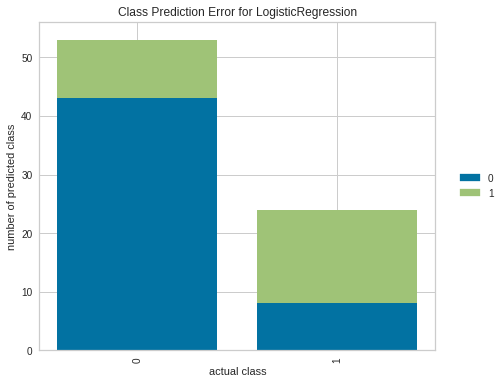

In [ ]:
#6. Evaluate performance of your model
plot_model(lr_model , plot = 'error')

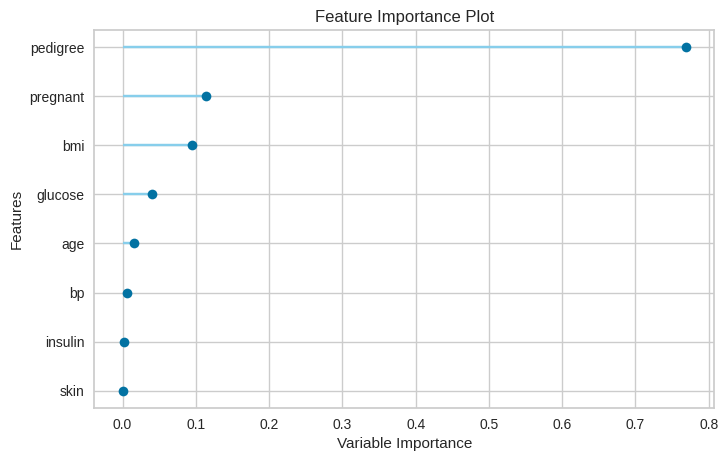

In [ ]:
#Plot importance of variables
plot_model(lr_model , plot = 'feature')

In [ ]:
predict_model(lr_model).head(20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7662,0.7979,0.6154,0.6667,0.64,0.4673,0.4682


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes,Label,Score
0,0.0,137.0,68.0,14.000000,148.0,24.799999,0.143,21.0,0,0,0.8649
1,1.0,97.0,70.0,40.000000,30.5,38.099998,0.218,30.0,0,0,0.8530
2,0.0,129.0,110.0,46.000000,130.0,67.099998,0.319,26.0,1,1,0.8519
3,4.0,125.0,80.0,20.536459,30.5,32.299999,0.536,27.0,1,0,0.6675
4,6.0,166.0,74.0,20.536459,30.5,26.600000,0.304,66.0,0,1,0.7484
5,5.0,103.0,108.0,37.000000,30.5,39.200001,0.305,65.0,0,0,0.6461
6,4.0,129.0,60.0,12.000000,231.0,27.500000,0.527,31.0,0,0,0.7464
7,5.0,143.0,78.0,20.536459,30.5,45.000000,0.190,47.0,0,1,0.8007
8,0.0,123.0,72.0,20.536459,30.5,36.299999,0.258,52.0,1,0,0.6520
9,8.0,120.0,78.0,20.536459,30.5,25.000000,0.409,64.0,0,0,0.6560


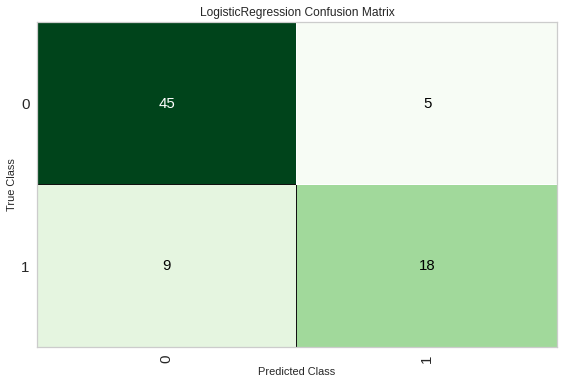

In [ ]:
#Confusion Matrix
plot_model(lr_model , plot = 'confusion_matrix')

In [ ]:
final = finalize_model(lr_tuned)